# Turning a Google Colab notebook into a web app

---

### This notebook is designed to be used alongside Anvil's [turning a Colab notebook into a web app tutorial](https://anvil.works/learn/tutorials/google-colab-to-web-app).

The text cells below tell you the steps you need to take to connect this notebook to an Anvil app. The steps are:


1. Install the `anvil-uplink` library
2. Import the `anvil.server` package
3. Connect the notebook using your apps Uplink key
4. Create a function to call from your app that includes the `anvil.server.callable` decorator
5. Add `anvil.server.wait_forever()` to the end of the notebook

### Follow along below for more detail.

---





### Let's start by installing the `anvil-uplink` library, all we need to do is add `!pip install anvil-uplink` to the first cell of the notebook:

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#실행 후 runtime 다시 실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,839 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: fall

In [ ]:
!pip install anvil-uplink

     |████████████████████████████████| 64 kB 2.0 MB/s 
     |████████████████████████████████| 51 kB 188 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=e2db30c2fcc7b9207e287c2450e65733a4de90d16d196d0dd331a741165aaa3f
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


### Next import the Anvil server package by adding `import anvil.server`:

Importing `anvil.server` means, when this notebook is connected via the Uplink, it will behave in the same way as any other [Anvil Server Module](https://anvil.works/docs/server).

In [ ]:
import anvil.server

### Then connect this notebook to your app using your Uplink key `anvil.server.connect("your-uplink-key")`:

For information on how to get your apps Uplink key, see [Step 4 - Enable the Uplink](https://anvil.works/learn/tutorials/google-colab-to-web-app#step-4-enable-the-uplink).

In [ ]:
anvil.server.connect("WOPDH2O4RB53RMBRPRO2MB6D-4SZNPSZA5HU5ZY36")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


### Build and train the classification model

The next cell gets the dataset, finds an optimal number of neighbours and then builds and trains the model. How this works is outside the scope of this tutorial, however, if you want to read more about how the code below works, Towards Data Science has a useful article [here](https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75).

#### *We don't need to change anything in the next cell.*


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn import metrics
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# import anvil.server
# import anvil.media
# from datetime import date

# iris = load_iris()
# X = iris.data
# y = iris.target

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=4)

# # The following code is used only when needing to find the optimal n_neighbors
# """
# scores = {}
# scores_list = []
# k_range = range(1, 26)
# for k in k_range:
#   knn = KNeighborsClassifier(n_neighbors=k)
#   knn.fit(X_train, y_train)
#   y_pred = knn.predict(X_test)
#   scores[k] = metrics.accuracy_score(y_test, y_pred)
#   scores_list.append(metrics.accuracy_score(y_test, y_pred))

# plt.plot(k_range,scores_list) 
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Testing Accuracy')
# """

# knn = KNeighborsClassifier(n_neighbors=10)
# knn.fit(X,y)

### Next, we will create our `predict_iris()` function with a `@anvil.server.callable` decorator. The decorator makes the function callable from our Anvil app. 
Add the following code to the next cell:
```
@anvil.server.callable
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
  classification = knn.predict([[sepal_length, sepal_width, petal_length, petal_width]])
  return iris.target_names[classification][0]
```





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 모듈 호출
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import requests
from datetime import datetime
import os
from datetime import date
import glob
import pandas as pd
import time
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'retina'
import anvil.server
import anvil.media
import anvil.tables as tables
from anvil.tables import app_tables



In [ ]:
# img_path = '/content/drive/MyDrive/Final_Project/구세은/{}'.format(date)
# img_path


In [ ]:
model_path ='/content/drive/MyDrive/Final_Project/구세은/model'
glob.glob(model_path + '/*')

['/content/drive/MyDrive/Final_Project/구세은/model/dryscalp_resnet1.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/erythema_resnet.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/folliculitis_resnet.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/dandruff_resnet.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/oilyscalp_resnet.h5',
 '/content/drive/MyDrive/Final_Project/구세은/model/hairloss_resnet.h5']

In [ ]:
shampoo = pd.read_csv('/content/drive/MyDrive/Final_Project/구세은/shampoo_final.csv')

In [ ]:
# survey = [0,2,2,2,1,1]

In [ ]:
# images_path = glob.glob(img_path + '/*.jpg')
# num_img = len(images_path)

# if num_img != 4:
#   raise Exception('Need 4 imges to process!!')
#   raise UserWarning('Exit Early')
# else:
#   print('good to go')


In [ ]:
# @anvil.server.callable
# def scalp_score(img_path, model_path):
#   out = []
#   img_folder_paths = glob.glob(img_path + '/*.jpg')
#   model_paths = glob.glob(model_path + '/*')
#   for i in img_folder_paths:
#     image_name = i[-5]
#     image = cv2.imread(i)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     image = cv2.resize(image,(224,224))
#     image = np.array(image)*1./255
#     image = image.reshape(1, 224,224,3)
#     for model in model_paths:
#       model_name = model.split('/')[-1]
#       model_name = model_name.split('_')[0]
#       model = load_model(model, compile = False)  
#       prediction =model.predict(image)
#       max = np.argmax(prediction)
#       out.append([image_name, model_name, max])
#   out = pd.DataFrame(out, columns = ['image_name', 'model_name', 'predict'])
#   mean = out.groupby(by='model_name').mean().reset_index()
#   print(mean)
#   return(mean)

In [ ]:
@anvil.server.callable
def scalp_score(img1, img2, img3, img4, q1,q2,q3,q4,q5,q6, name, datetime):
  global model_path
  
  out = []
  survey = [q1,q2,q3,q4,q5,q6]
  survey = list(map(int, survey))
  # img_folder_paths = glob.glob(img_path + '/*.jpg')
  model_paths = glob.glob(model_path + '/*')
  image_name = 'img1'
  with anvil.media.TempFile(img1) as filename:
    image = cv2.imread(filename)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  image = np.array(image)*1./255
  image = image.reshape(1, 224,224,3)
  for model in model_paths:
      model_name = model.split('/')[-1]
      model_name = model_name.split('_')[0]
      model = load_model(model, compile = False)  
      prediction =model.predict(image)
      max = np.argmax(prediction)
      out.append([image_name, model_name, max])

  with anvil.media.TempFile(img2) as filename:
      image = cv2.imread(filename)
  image_name = 'img2'

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  image = np.array(image)*1./255
  image = image.reshape(1, 224,224,3)
  for model in model_paths:
      model_name = model.split('/')[-1]
      model_name = model_name.split('_')[0]
      model = load_model(model, compile = False)  
      prediction =model.predict(image)
      max = np.argmax(prediction)
      out.append([image_name, model_name, max])

  with anvil.media.TempFile(img3) as filename:
    image = cv2.imread(filename)
  image_name = 'img3'
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  image = np.array(image)*1./255
  image = image.reshape(1, 224,224,3)
  for model in model_paths:
      model_name = model.split('/')[-1]
      model_name = model_name.split('_')[0]
      model = load_model(model, compile = False)  
      prediction =model.predict(image)
      max = np.argmax(prediction)
      out.append([image_name, model_name, max])

  with anvil.media.TempFile(img4) as filename:
      image = cv2.imread(filename)
  image_name = 'img4'
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  image = np.array(image)*1./255
  image = image.reshape(1, 224,224,3)
  for model in model_paths:
      model_name = model.split('/')[-1]
      model_name = model_name.split('_')[0]
      model = load_model(model, compile = False)  
      prediction =model.predict(image)
      max = np.argmax(prediction)
      out.append([image_name, model_name, max])
  out = pd.DataFrame(out, columns = ['image_name', 'model', 'predict'])
  mean = out.groupby(by='model').mean().reset_index()
  mean = mean.set_index('model')
  predict_list = mean.predict.tolist()


  scalp_type = np.where(survey[0] >survey[1], '건성', 
                      np.where(survey[0] < survey[1],'지성', '중성')).tolist()
  scalp_type2 = np.where(scalp_type == '건성', '악건성',
                       np.where(scalp_type == '지성', '악지성', '중성')).tolist()
  scalp_score = np.where (scalp_type == 0, 0, round((mean.predict.dryscalp + mean.predict.oilyscalp )/2, 1)).tolist()                   
  hairloss_score = round(np.mean([mean.predict.hairloss  , min(survey[4], survey[5])]),1)
  sensitivity_score = round(np.mean([mean.predict.erythema, survey[2] ]),1)
  dandruff_score = round(np.mean([mean.predict.dandruff, mean.predict.folliculitis]),1)
  # pimple = np.where(frcnn == 1, 3, np.nan).tolist()
  folliculitis_score = round(np.nanmean([mean.predict.folliculitis, survey[3], mean.predict.erythema]),1) #pimple 제외
  final_list = [scalp_score, hairloss_score, sensitivity_score, dandruff_score, folliculitis_score]
  rec_list =[i for i, x in enumerate(final_list) if x >=2]
  final_index = [scalp_type2, '탈모', '민감성', '비듬', '두피염' ]
  final_index2 = [scalp_type, '탈모', '민감성', '비듬', '두피염' ]
  final_keyword = list(map(lambda x: final_index[x], rec_list))
  final_keyword2 = ', '.join(final_keyword)
  final_keyword3 = list(map(lambda x: final_index2[x], rec_list))
  final_keyword3 = ', '.join(final_keyword3)

  # today = date.today()
  # date = today.strftime('%y_%m_%d')
  date = datetime.strftime("%y-%m-%d")

  plt.rc('font', family='NanumBarunGothic')
  markers = [0,1,2,3]
  labels = np.array(final_index)
  angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
  stats = np.concatenate((final_list,[final_list[0]]))
  angles = np.concatenate((angles,[angles[0]]))

  fig = plt.figure(figsize = (10,10))
  ax = fig.add_subplot(111, polar=True)
  ax.plot(angles, stats, 'o-', linewidth=2)
  ax.fill(angles, stats, alpha=0.25)
  ax.set_thetagrids(angles * 180/np.pi, labels)
  plt.yticks(markers)
  ax.grid(True)
  fig.savefig("/content/drive/MyDrive/Final_Project/구세은/{}_{}_radarchart.png".format(name, date))
  plt.show()
  
  send_image = anvil.media.from_file("/content/drive/MyDrive/Final_Project/구세은/{}_{}_radarchart.png".format(name, date))
  final_list = ','.join(str(item) for item in final_list)
  predict_list = ','.join(str(item) for item in predict_list)
  
  return final_list, predict_list, scalp_type, final_keyword2, final_keyword3, send_image
  



In [ ]:
@anvil.server.callable
def import_csv_data(file):
  with open(file, "r") as f:
    df = pd.read_csv(f)
    for d in df.to_dict(orient="records"):
      # d is now a dict of {columnname -> value} for this row
      # We use Python's **kwargs syntax to pass the whole dict as
      # keyword arguments
      app_tables.product.add_row(**d)

In [ ]:
@anvil.server.callable
def recommend(final_keyword, datetime) :
    final_keyword = final_keyword.split(', ')
    result = shampoo[shampoo['spec_list'].apply(lambda words: all(word in words for word in final_keyword))]
    result = result[result['rate'] > 4.6]
    result.sort_values(['rate','opinion'], ascending = False, ignore_index = True, inplace = True)
    # result = result.sort_values(by = 'price', ascending = False, ignore_index = True)
    result10 = result[:10] 
    result10['datetime'] = datetime
    result_csv = result10.to_csv('result_10.csv')
    import_csv_data('result_10.csv')
  

In [ ]:
# start = time.time()
# df = scalp_score(img_path, model_path)
# end = time.time()
# print(f'total time(s):{end-start}')

### Finally, let's add `anvil.server.wait_forever()` function so the notebook is always available to the web app:

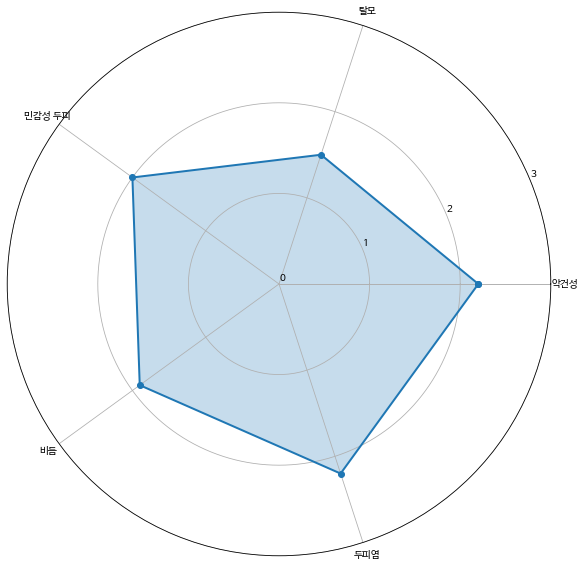

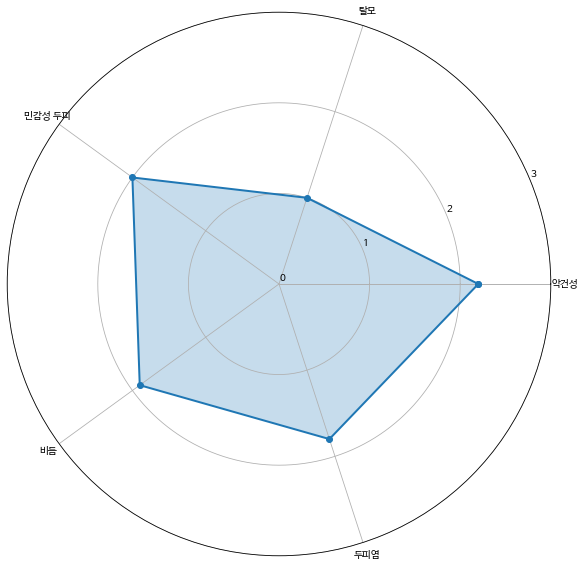

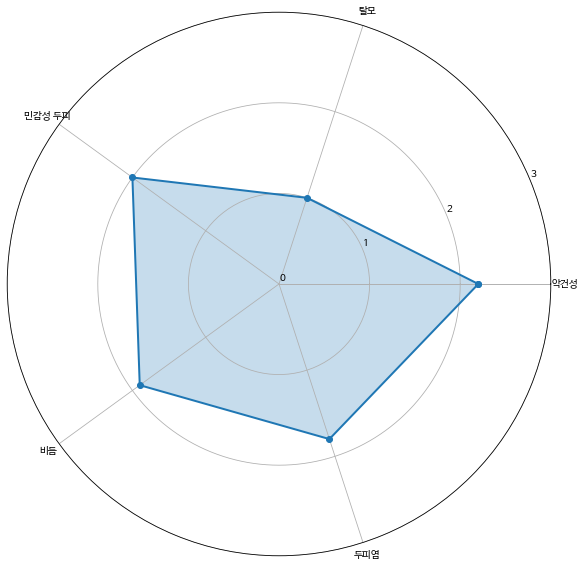

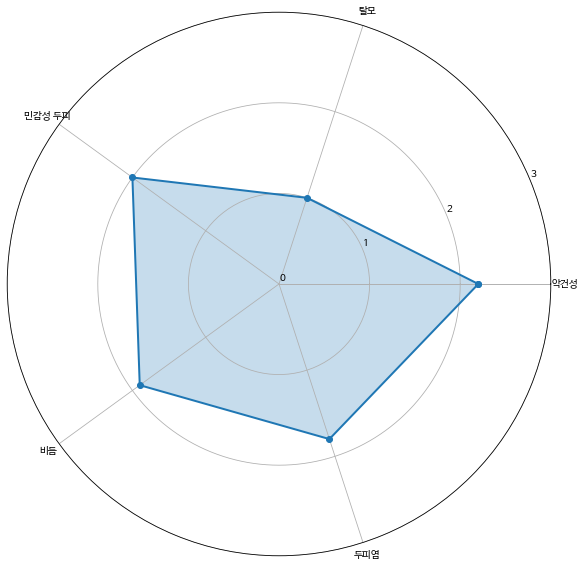

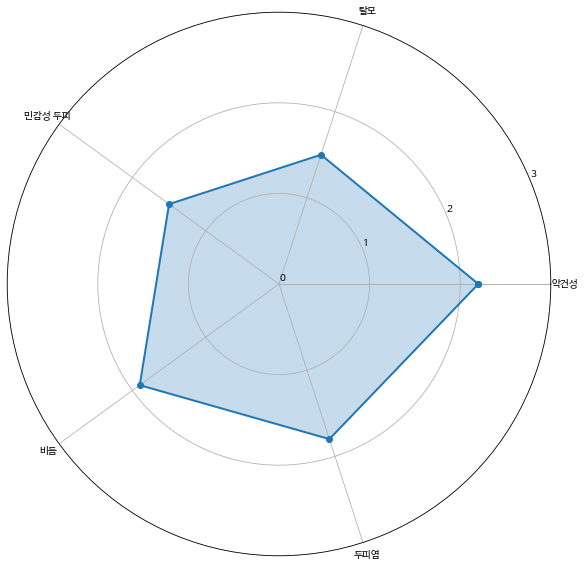

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


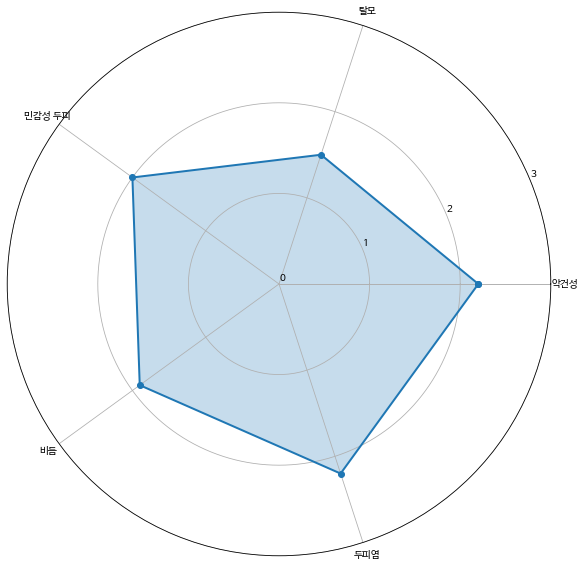

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


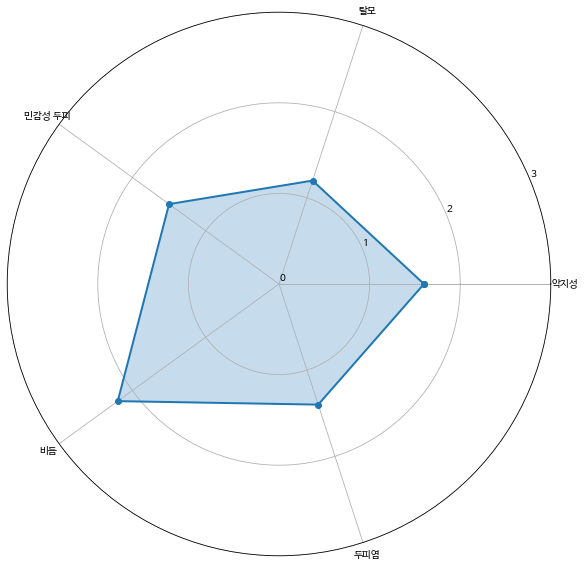

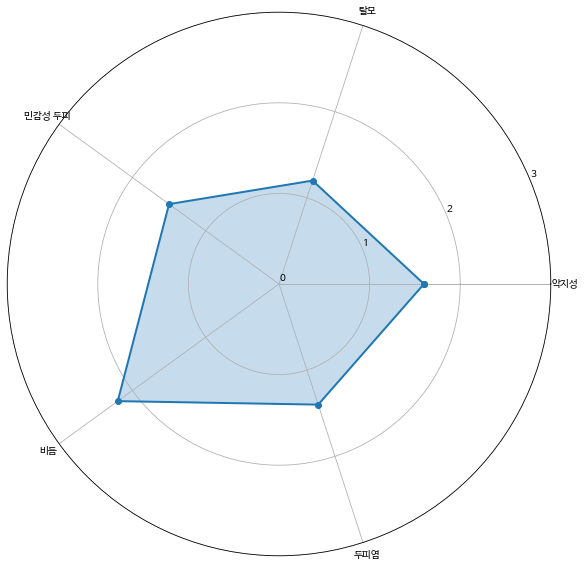

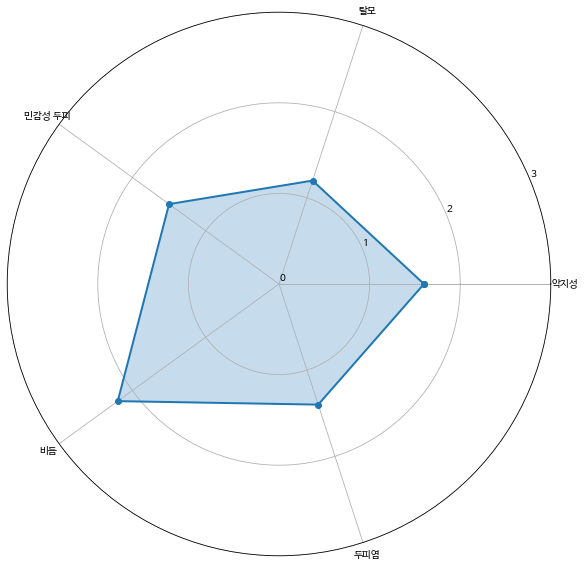

In [ ]:
anvil.server.wait_forever()

---

## That's it, 5 simple steps to connect your notebook to your Anvil app! 

---